<h1>Validating_Model_Ad_Sale_Prediction_from_Existing_customer_Logistic_Regression_Validating_Model</h1>

In [93]:
#Importing library
import numpy as np
import pandas as pd

#Loading the dataset
df = pd.read_csv('DigitalAd_dataset.csv')

#Summarize Dataset
print("Shape of Dataset\n" , df.shape)
print()
print(df.head())

Shape of Dataset
 (400, 3)

   Age  Salary  Status
0   18   82000       0
1   29   80000       0
2   47   25000       1
3   45   26000       1
4   46   28000       1


In [95]:
# Seggregating Dataset into X (Input Variable) & Y (Output Variable)

    #Input Variable - X
x = df.drop('Status', axis = 1)
print("Input Variable - X\n" , x)

    #Output Variable - Y
y = df.Status
print("Output Variable - Y\n" , y)


Input Variable - X
      Age  Salary
0     18   82000
1     29   80000
2     47   25000
3     45   26000
4     46   28000
..   ...     ...
395   35   65000
396   26   80000
397   26   52000
398   20   86000
399   32   18000

[400 rows x 2 columns]
Output Variable - Y
 0      0
1      0
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Status, Length: 400, dtype: int64


In [97]:
# Identify NaN Values in Dataset

df.isna().any()

Age       False
Salary    False
Status    False
dtype: bool

In [99]:
# Splitting Dataset into Train & Test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [101]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [103]:
# Training

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [109]:
# Prediction for all Test Data

y_pred = model.predict(x_test)
print(np.column_stack((y_pred,y_test)))

[[0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [115]:
# Evaluting Model - Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[61  0]
 [20 19]]


In [123]:
# Accuracy Score

from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test, y_pred)*100

print(Accuracy)

80.0


No Skill: ROC AUC=50.000
Logistic Skill: ROC AUC=92.980


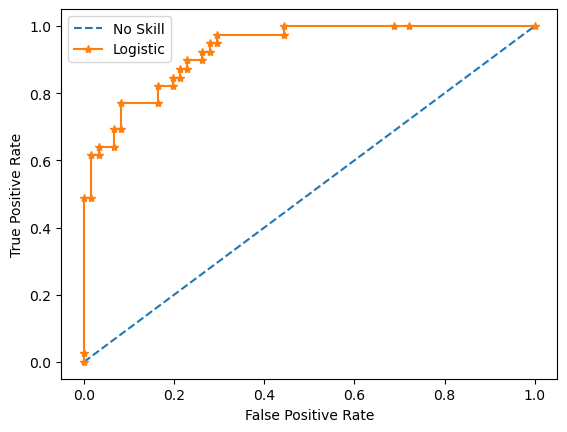

In [131]:
# Receiver Operating Curve - ROC Curve

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

nsProbability = [0 for _ in range(len(y_test))]
lsProbability = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lsProbability = lsProbability[:, 1]
# calculate scores
nsAUC = roc_auc_score(y_test, nsProbability)
lrAUC = roc_auc_score(y_test, lsProbability)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (nsAUC*100))
print('Logistic Skill: ROC AUC=%.3f' % (lrAUC*100))
# calculate roc curves
nsFP, nsTP, _ = roc_curve(y_test, nsProbability)
lrFP, lrTP, _ = roc_curve(y_test, lsProbability)
# plot the roc curve for the model
plt.plot(nsFP, nsTP, linestyle='--', label='No Skill')
plt.plot(lrFP, lrTP, marker='*', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()

In [138]:
# Cross Validation Score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=100,shuffle=True)
result = cross_val_score(model, x, y, cv=kfold)
print("CROSS VALIDATION SCORE: %.2f%%" % (result.mean()*100.0))

CROSS VALIDATION SCORE: 64.25%


100
39


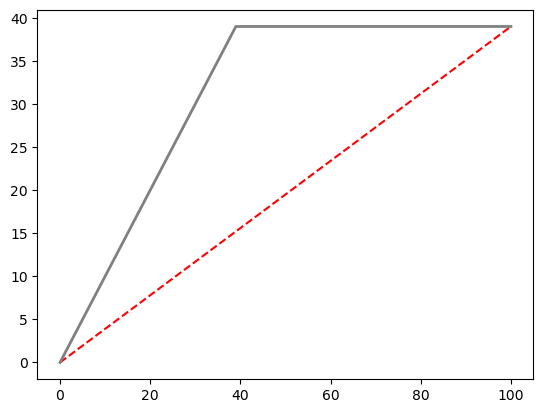

In [146]:
#Cumulative Accuracy Profile Curve

total = len(y_test)
print(total)
class_1_count = np.sum(y_test)
print(class_1_count)
class_0_count = total - class_1_count
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
plt.plot([0, class_1_count, total],
         [0, class_1_count, class_1_count],
         c = 'grey',
         linewidth = 2,
         label = 'Perfect Model')

probs = model.predict_proba(x_test)
probs = probs[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)
